In [2]:
# install the necessary library
%pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\KHAIRI\Desktop\toxicity_evaluation\toxicity_env\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\KHAIRI\Desktop\toxicity_evaluation\toxicity_env\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\KHAIRI\Desktop\toxicity_evaluation\toxicity_env\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^

In [3]:
# import necessary libraries

import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
# read the csv file containing the data

df = pd.read_csv(r'C:\Users\KHAIRI\Downloads\comments\train.csv')

In [5]:
# show some data

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
# show the first comment text

df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
# import TextVectorization

from tensorflow.keras.layers import TextVectorization

In [8]:
# split data into comment texts and values of toxicity evaluation so
# each comment has a vector which represents the categories

X = df['comment_text']
y = df[df.columns[2:]].values

In [9]:
# number of words in the vocab
MAX_FEATURES = 200000

In [10]:
# initialization of the text voctorization layer

vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [11]:
# train the vectorize the vacab (represent comments as numpy)

vectorizer.adapt(X.values)

In [12]:
# Save the vocabulary to a text file
vocab = vectorizer.get_vocabulary()

with open('vocab.txt', 'w', encoding='utf-8') as f:
    for word in vocab:
        f.write(word + '\n')

In [13]:
# get the vacab and explain the mapping

vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('the'),
 np.str_('to'),
 np.str_('of'),
 np.str_('and'),
 np.str_('a'),
 np.str_('you'),
 np.str_('i'),
 np.str_('is'),
 np.str_('that'),
 np.str_('in'),
 np.str_('it'),
 np.str_('for'),
 np.str_('this'),
 np.str_('not'),
 np.str_('on'),
 np.str_('be'),
 np.str_('as'),
 np.str_('have'),
 np.str_('are'),
 np.str_('your'),
 np.str_('with'),
 np.str_('if'),
 np.str_('article'),
 np.str_('was'),
 np.str_('or'),
 np.str_('but'),
 np.str_('page'),
 np.str_('my'),
 np.str_('an'),
 np.str_('from'),
 np.str_('by'),
 np.str_('do'),
 np.str_('at'),
 np.str_('about'),
 np.str_('me'),
 np.str_('so'),
 np.str_('wikipedia'),
 np.str_('can'),
 np.str_('what'),
 np.str_('there'),
 np.str_('all'),
 np.str_('has'),
 np.str_('will'),
 np.str_('talk'),
 np.str_('please'),
 np.str_('would'),
 np.str_('its'),
 np.str_('no'),
 np.str_('one'),
 np.str_('just'),
 np.str_('like'),
 np.str_('they'),
 np.str_('he'),
 np.str_('dont'),
 np.str_('which'),
 np.str_('any'),
 np.str_('been'),
 np

In [14]:
 # numerical representation of the comments

vectorized_text = vectorizer(X.values)

In [15]:
# create the dataset pipeline (map, cache, shuffle, batch, prefetch)

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [16]:
# training, validation, and testing partitions

train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [17]:
train_generator = train.as_numpy_iterator()

In [18]:
train_generator.next()

(array([[    35,     37,    344, ...,      0,      0,      0],
        [ 18537,  19643,   2393, ...,      0,      0,      0],
        [  6206,   1441,  38407, ...,      0,      0,      0],
        ...,
        [    46,    207,    227, ...,      0,      0,      0],
        [   230,      4,      2, ...,      0,      0,      0],
        [   978,   4357, 188312, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [20]:
model = Sequential()
# create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# create LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# feature extractor fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# final layer to map the different number of outputs
model.add(Dense(6, activation='sigmoid'))

In [21]:
# compile the model

model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# train the model

history = model.fit(train, epochs=8, validation_data=val)

Epoch 1/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 14597s 2s/step - loss: 0.0835 - val_loss: 0.0499
Epoch 2/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 6562s 940ms/step - loss: 0.0474 - val_loss: 0.0489
Epoch 3/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 36132s 5s/step - loss: 0.0415 - val_loss: 0.0349
Epoch 4/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 14153s 2s/step - loss: 0.0367 - val_loss: 0.0346
Epoch 5/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5873s 841ms/step - loss: 0.0326 - val_loss: 0.0304
Epoch 6/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 11176s 2s/step - loss: 0.0291 - val_loss: 0.0271
Epoch 7/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 13813s 2s/step - loss: 0.0262 - val_loss: 0.0238
Epoch 8/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 6215s 890ms/step - loss: 0.0245 - val_loss: 0.0213


In [26]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

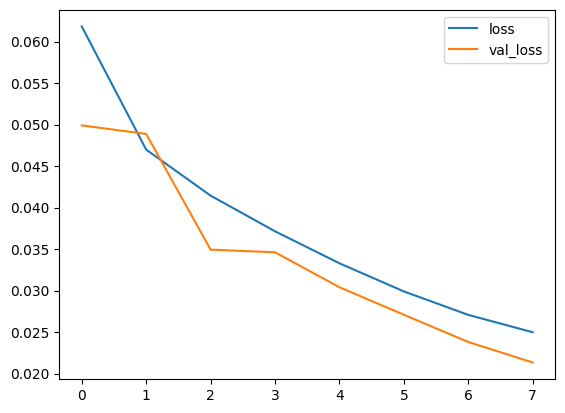

In [27]:
# plot the loss and val_loss

plt.figure(figsize=(8, 5))
pd.DataFrame(history.history).plot()
plt.show()

In [28]:
input_text = vectorizer('You freaking suck!')


In [29]:
batch = test.as_numpy_iterator().next()


In [30]:
res = model.predict(np.expand_dims(input_text,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


In [31]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [32]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [33]:
for batch in test.as_numpy_iterator():
  # unpack the batch
  X_true, y_true = batch
  # make a prediction
  yhat = model.predict(X_true)
  # flatten the predictions
  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [34]:
print(f'Precision: {pre.result().numpy()}, Reacll: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.890350878238678, Reacll: 0.8916544914245605, Accuracy: 0.5225676894187927


In [35]:
%pip install gradio jinja2


  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached anyio-4.6.2.post1-py3-none-any.whl.metadata (4.7 kB)
  Using cached fastapi-0.115.4-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.4.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.4.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached orjson-3.10.11-cp312-none-win_amd64.whl.metadata (52 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.12-py3-none-any.whl.metadata (1.9 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached ruff-0.7.2-py3-none-win_amd64.

In [36]:
import tensorflow as tf
import gradio as gr

c:\Users\KHAIRI\Desktop\toxicity_evaluation\toxicity_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
model.save('toxicity.h5')


In [38]:
# Load the trained model
model = tf.keras.models.load_model('toxicity.h5')

In [39]:
# Load the TextVectorization layer
vectorizer = TextVectorization(max_tokens=200000, output_sequence_length=1800, output_mode='int')
vectorizer.adapt(X.values) 

In [40]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:-1]):  # Ensure df is loaded if you're using it here
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)

    return text

In [41]:
# Example of how to use the score_comment function
comment = "You freaking suck!"
print(score_comment(comment))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
toxic: True
severe_toxic: False
obscene: True
threat: False
insult: True



In [42]:
import gradio as gr


In [ ]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='comment to score'),
                         outputs='text')

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://718f6f0b69dddba9a0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
